Швыдкий Александр, СТСА-20-1

Лабораторная работа №3

Максимум

Chapter 7

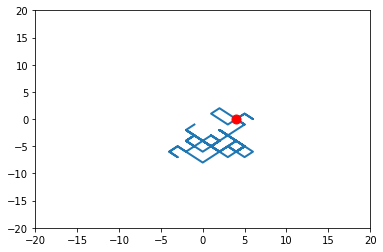

In [1]:
from __future__ import division

import matplotlib.pyplot as plt
from matplotlib import animation
from numpy.random import random as rand
# Set number of steps for each random walk.
num_steps = 100
# Create an empty figure of the desired size.
plt.close('all') # Clear anything left over from prior runs.
bound = 20
fig = plt.figure() # Must have figure object for movie.
ax = plt.axes(xlim=(-bound, bound), ylim=(-bound, bound))
# Create empty line and point objects with no data.
# They will be updated during each frame of the animation.
(my_line,) = ax.plot([], [], lw=2) # Line to show path
(my_point,) = ax.plot([], [], 'ro', ms=9) # Dot to show current position
# Generate the random walk data.
x_steps = 2*(rand(num_steps) < 0.5) - 1 # Generate random steps +/- 1.
y_steps = 2*(rand(num_steps) < 0.5) - 1
x_coordinate = x_steps.cumsum() # Sum steps to get position.
y_coordinate = y_steps.cumsum()
# This function will generate each frame of the animation.
# It adds all of the data through frame n to a line
# and moves a point to the nth position of the walk.
def get_step(n, x, y, this_line, this_point):
    this_line.set_data(x[:n+1], y[:n+1])
    this_point.set_data(x[n], y[n])
# Call the animator and create the movie.
my_movie = animation.FuncAnimation(fig, get_step, frames=num_steps,
fargs=(x_coordinate, y_coordinate, my_line, my_point) )

# Save the movie in the current directory.
# *** NEXT LINE WILL CAUSE AN ERROR UNLESS FFMPEG OR MENCODER IS INSTALLED. ***
my_movie.save('random_walk.mp4', fps=30)




Found 1 files of the format *.jpg.

Making HTML code for displaying 099_movie.jpg


movie in output file movie.html


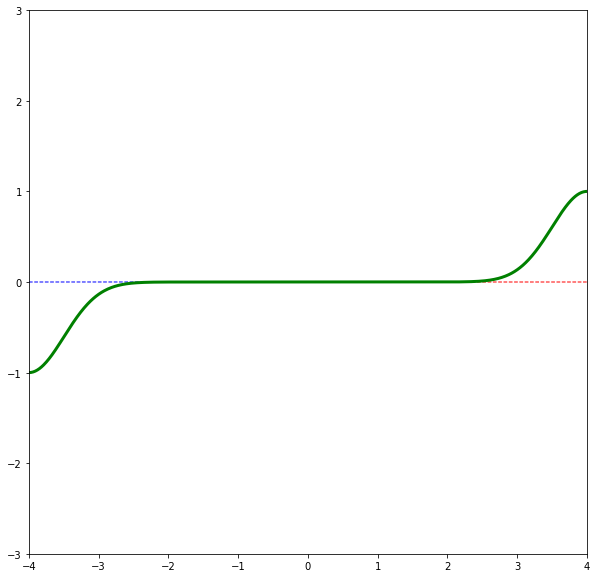

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# First obtain html_movie.py via http://press.princeton.edu/titles/10644.html
# or http://physicalmodelingwithpython.blogspot.com/ .
from html_movie import movie

# Generate waves for each frame.
# Return a Gaussian with specified center and spread using array s.
def gaussian(s, center=0.0, spread=1.0):
    return np.exp(-2 * (s - center)**2 / spread**2)
# All lengths are in [m], all times are in [s], and all speeds are in [m/s].
# Define the range of values to display.
x_min, x_max = -4.0, 4.0
y_min, y_max = -3.0, 3.0
# Define array of positions.
dx = 0.01
x = np.arange(x_min, x_max + dx, dx)
# Define the duration and number of frames for the simulation.
tmin, tmax = 0.0, 4.0
num_frames = 100
t = np.linspace(tmin, tmax, num_frames)
# Define the initial position and speed of Gaussian waves.
r_speed = 2.0 # Speed of right-moving wave
r_0 = -4.0 # Initial position of right-moving wave
l_speed = -2.0 # Speed of left-moving wave
l_0 = 4.0 # Initial position of left-moving wave
# Generate a figure and get access to its Axes object.
plt.close('all')
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max))
# Create three empty line objects and grab control.
# The loop below will update the lines in each frame.
ax.plot([], [], 'b--', lw=1) # Line for right-moving wave
ax.plot([], [], 'r--', lw=1) # Line for left-moving wave
ax.plot([], [], 'g-', lw=3) # Line for sum of waves
lines = ax.get_lines() # Get list of 3 line objects in plot.

# It is essential that the frames be named in alphabetical order.
# {:03d} formats integers with three digits, including leading zeros if needed:
# '000_movie.jpg', '001_movie.jpg', and so on.
file_name = "{:03d}_movie.jpg"

# Generate frames and save each figure as a separate .jpg file.
for i in range(num_frames):
    r_now = r_0 + r_speed * t[i] # Update centers of waves.
    l_now = l_0 + l_speed * t[i]
yR = gaussian(x, r_now) # Get current data for waves.
yL = -gaussian(x, l_now)
lines[0].set_data(x, yR) # Update right-moving wave.

lines[1].set_data(x, yL) # Update left-moving wave.
lines[2].set_data(x, yR + yL) # Update sum of waves.
plt.savefig(file_name.format(i)) # Save current plot.
# Use HTML movie encoder adapted from scitools to create an HTML document that
# will display the frames as a movie. Open movie.html in Web browser to view.
movie(input_files='*.jpg', output_file='movie.html')

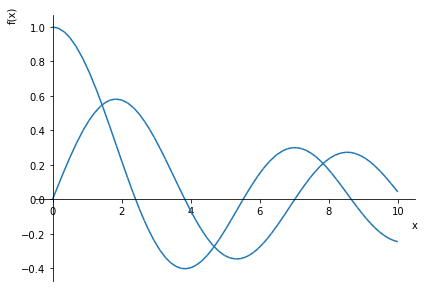

In [3]:
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
init_printing()
expand((x + y) ** 5)
factor(x ** 6 - 1)
pi.n(100)
plot(besselj(0, x), besselj(1, x), (x, 0, 10))
diff(x * sin(y), x, y)
integrate(cos(x) ** 2, x)
integrate(exp(-x ** 2), (x, -oo, oo))
Sum(k ** 3, (k, 0, m)).doit().factor()
dsolve(f(x).diff(x) + f(x) - x, f(x)).simplify()
limit( sin(x) / x, x, 0 )

Chapter 8

In [4]:
import scipy.ndimage as sim

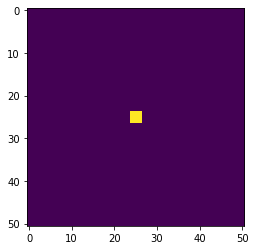

In [5]:
impulse = np.zeros( (51, 51) )
impulse[25, 25] = 1.0
my_filter = np.ones( (3, 3) ) / 9
response = sim.convolve(impulse, my_filter)
plt.figure()
plt.imshow(response)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as sim

Create a grid of points for the Gaussian filter.

In [7]:
v = np.arange(-25, 26)
X, Y = np.meshgrid(v, v)

Create elongated Gaussian filter, apply Laplacian.

In [8]:
gauss_filter = np.exp(-0.5*(X**2/2 + Y**2/45))
laplace_filter = np.array( [[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
combined_filter  = sim.convolve(gauss_filter, laplace_filter)

Create a plus sign '+' to demonstrate effect of filter.

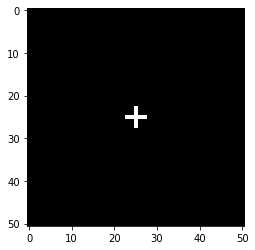

In [9]:
plus = np.zeros((51, 51))
plus[23:28, 25] = 1.0
plus[25, 23:28] = 1.0

plt.figure()
plt.imshow(plus)
plt.gray()

Apply filter to '+' and display resulting image.

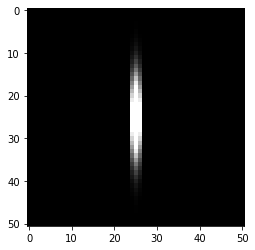

In [10]:
#   Use vmin/vmax to emphasize features within a restricted range of intensity.
cplus = sim.convolve(plus, combined_filter)

plt.figure()
plt.imshow(cplus, vmin=0, vmax=0.5*cplus.max())
plt.gray()

plt.show()